
# Matplotlib Overview Lecture

## Introduction
Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/
    
## Importing
Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [1]:
import matplotlib.pyplot as plt

You'll also need to use this line to see plots in the notebook:

In [2]:
%matplotlib inline

# Basic Example

Let's walk through a very simple example using two numpy arrays:

In [3]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [4]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Basic Matplotlib Commands

Text(0.5, 1.0, 'String Title Here')

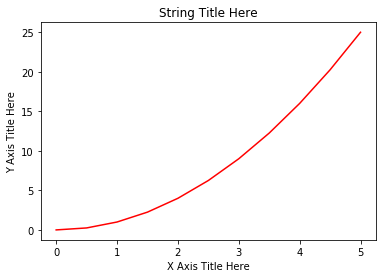

In [8]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
#plt.show()

## Creating Multiplots on Same Canvas

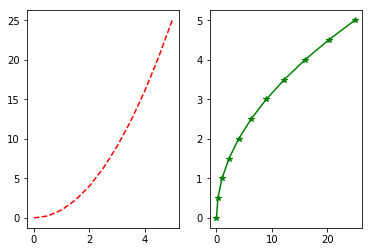

In [9]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') 
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

# Matplotlib Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

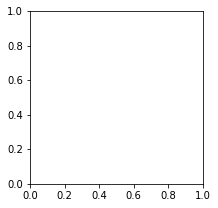

In [10]:
fig = plt.figure() # Create Figure (empty canvas)
axes = fig.add_axes([0.6, 0.8, 0.4, 0.6]) # left, bottom, width, height (range 0 to 1)

Text(0.5, 1.0, 'Set Title')

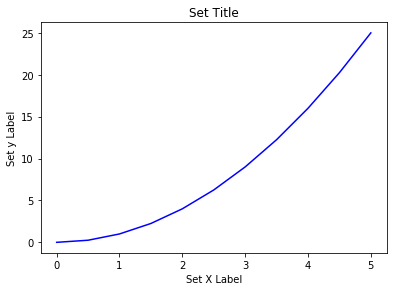

In [18]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

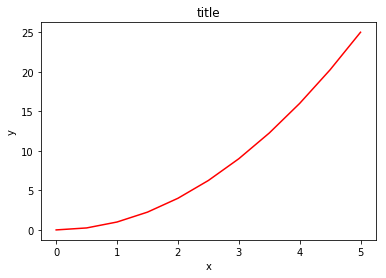

In [19]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

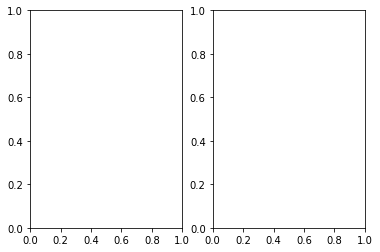

In [20]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [21]:
# Axes is an array of axes to plot on
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000296F8D28A20>,
      dtype=object)

We can iterate through this array:

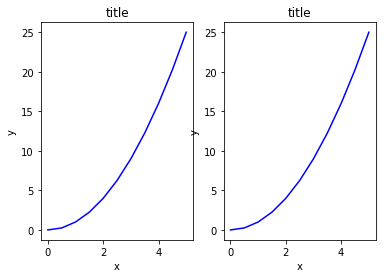

In [22]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

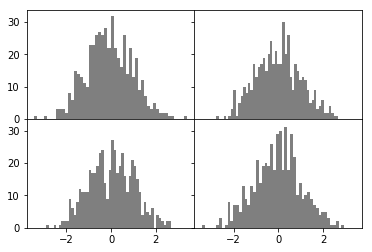

In [23]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [24]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Saving to png

In [25]:
fig.savefig("filename.png")

### Colors, Markers, and Line Styles

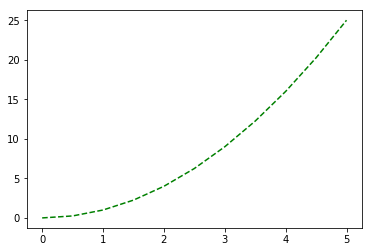

In [26]:
fig, ax = plt.subplots()
ax.plot(x, y, 'g--')

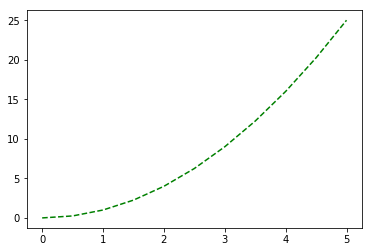

In [27]:
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='--', color='g')

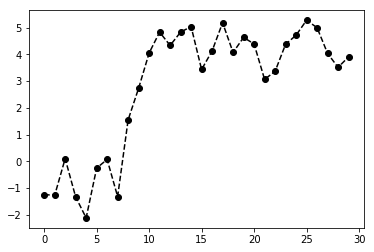

In [32]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

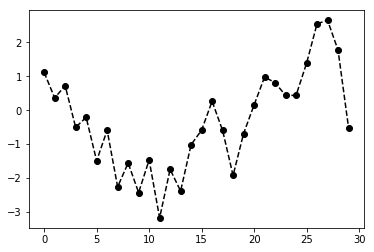

In [33]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

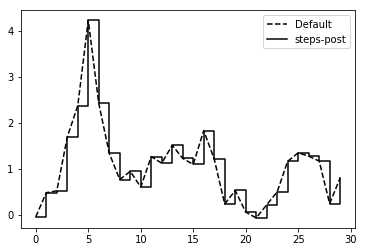

In [34]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

In [3]:
from datetime import datetime
import pandas as pd

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

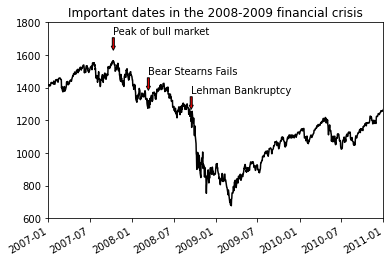

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left',verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

## Realistic example

In [7]:
gdp_cap=[974.58033839999996,
 5937.0295259999984,
 6223.3674650000003,
 4797.2312670000001,
 12779.379639999999,
 34435.367439999995,
 36126.492700000003,
 29796.048340000001,
 1391.253792,
 33692.605080000001,
 1441.2848730000001,
 3822.137084,
 7446.2988029999997,
 12569.851769999999,
 9065.8008250000003,
 10680.792820000001,
 1217.0329939999999,
 430.07069159999998,
 1713.7786860000001,
 2042.0952400000001,
 36319.235009999997,
 706.01653699999997,
 1704.0637240000001,
 13171.638849999999,
 4959.1148540000004,
 7006.5804189999999,
 986.14787920000003,
 277.55185870000003,
 3632.5577979999998,
 9645.06142,
 1544.7501119999999,
 14619.222719999998,
 8948.1029230000004,
 22833.308509999999,
 35278.418740000001,
 2082.4815670000007,
 6025.3747520000015,
 6873.2623260000009,
 5581.1809979999998,
 5728.3535140000004,
 12154.089749999999,
 641.36952360000021,
 690.80557590000001,
 33207.0844,
 30470.0167,
 13206.48452,
 752.74972649999995,
 32170.37442,
 1327.6089099999999,
 27538.41188,
 5186.0500030000003,
 942.6542111,
 579.23174299999982,
 1201.637154,
 3548.3308460000007,
 39724.978669999997,
 18008.944439999999,
 36180.789190000003,
 2452.210407,
 3540.6515639999998,
 11605.71449,
 4471.0619059999999,
 40675.996350000001,
 25523.277099999999,
 28569.719700000001,
 7320.8802620000015,
 31656.068060000001,
 4519.4611709999999,
 1463.249282,
 1593.06548,
 23348.139730000006,
 47306.989780000004,
 10461.05868,
 1569.3314419999999,
 414.5073415,
 12057.49928,
 1044.7701259999999,
 759.34991009999999,
 12451.6558,
 1042.581557,
 1803.151496,
 10956.991120000001,
 11977.57496,
 3095.7722710000007,
 9253.896111,
 3820.1752299999998,
 823.68562050000003,
 944.0,
 4811.0604290000001,
 1091.359778,
 36797.933319999996,
 25185.009109999999,
 2749.3209649999999,
 619.67689239999982,
 2013.9773049999999,
 49357.190170000002,
 22316.192869999999,
 2605.94758,
 9809.1856360000002,
 4172.8384640000004,
 7408.9055609999996,
 3190.4810160000002,
 15389.924680000002,
 20509.64777,
 19328.709009999999,
 7670.122558,
 10808.47561,
 863.08846390000019,
 1598.4350890000001,
 21654.83194,
 1712.4721360000001,
 9786.5347139999994,
 862.54075610000018,
 47143.179640000002,
 18678.314350000001,
 25768.257590000001,
 926.14106830000003,
 9269.6578079999999,
 28821.063699999999,
 3970.0954069999998,
 2602.3949950000001,
 4513.4806429999999,
 33859.748350000002,
 37506.419070000004,
 4184.5480889999999,
 28718.276839999999,
 1107.482182,
 7458.3963269999977,
 882.9699437999999,
 18008.509239999999,
 7092.9230250000001,
 8458.2763840000007,
 1056.3801209999999,
 33203.261279999999,
 42951.65309,
 10611.46299,
 11415.805689999999,
 2441.5764039999999,
 3025.3497980000002,
 2280.769906,
 1271.211593,
 469.70929810000007]

In [8]:
life_exp = [43.828000000000003,
 76.423000000000002,
 72.301000000000002,
 42.731000000000002,
 75.319999999999993,
 81.234999999999999,
 79.828999999999994,
 75.635000000000005,
 64.061999999999998,
 79.441000000000003,
 56.728000000000002,
 65.554000000000002,
 74.852000000000004,
 50.728000000000002,
 72.390000000000001,
 73.004999999999995,
 52.295000000000002,
 49.579999999999998,
 59.722999999999999,
 50.43,
 80.653000000000006,
 44.741000000000007,
 50.651000000000003,
 78.552999999999997,
 72.960999999999999,
 72.888999999999996,
 65.152000000000001,
 46.462000000000003,
 55.322000000000003,
 78.781999999999996,
 48.328000000000003,
 75.748000000000005,
 78.272999999999996,
 76.486000000000004,
 78.331999999999994,
 54.790999999999997,
 72.234999999999999,
 74.994,
 71.338000000000022,
 71.878,
 51.578999999999994,
 58.039999999999999,
 52.947000000000003,
 79.313000000000002,
 80.656999999999996,
 56.734999999999999,
 59.448,
 79.406000000000006,
 60.021999999999998,
 79.483000000000004,
 70.259,
 56.006999999999998,
 46.388000000000012,
 60.915999999999997,
 70.198000000000008,
 82.207999999999998,
 73.338000000000022,
 81.757000000000005,
 64.698000000000008,
 70.650000000000006,
 70.963999999999999,
 59.545000000000002,
 78.885000000000005,
 80.745000000000005,
 80.546000000000006,
 72.566999999999993,
 82.602999999999994,
 72.534999999999997,
 54.109999999999999,
 67.296999999999997,
 78.623000000000005,
 77.588000000000022,
 71.992999999999995,
 42.591999999999999,
 45.677999999999997,
 73.951999999999998,
 59.443000000000012,
 48.302999999999997,
 74.241,
 54.466999999999999,
 64.164000000000001,
 72.801000000000002,
 76.194999999999993,
 66.802999999999997,
 74.543000000000006,
 71.164000000000001,
 42.082000000000001,
 62.069000000000003,
 52.906000000000013,
 63.784999999999997,
 79.762,
 80.203999999999994,
 72.899000000000001,
 56.866999999999997,
 46.859000000000002,
 80.195999999999998,
 75.640000000000001,
 65.483000000000004,
 75.536999999999978,
 71.751999999999995,
 71.421000000000006,
 71.688000000000002,
 75.563000000000002,
 78.097999999999999,
 78.746000000000024,
 76.441999999999993,
 72.475999999999999,
 46.241999999999997,
 65.528000000000006,
 72.777000000000001,
 63.061999999999998,
 74.001999999999995,
 42.568000000000012,
 79.971999999999994,
 74.662999999999997,
 77.926000000000002,
 48.158999999999999,
 49.338999999999999,
 80.941000000000003,
 72.396000000000001,
 58.555999999999997,
 39.613,
 80.884,
 81.701000000000022,
 74.143000000000001,
 78.400000000000006,
 52.517000000000003,
 70.616,
 58.420000000000002,
 69.819000000000003,
 73.923000000000002,
 71.777000000000001,
 51.542000000000002,
 79.424999999999997,
 78.242000000000004,
 76.384,
 73.747,
 74.248999999999995,
 73.421999999999997,
 62.698,
 42.383999999999993,
 43.487000000000002]

In [9]:
pop= [31.889923,
 3.6005229999999999,
 33.333216,
 12.420476000000001,
 40.301926999999999,
 20.434176000000001,
 8.199783,
 0.70857300000000001,
 150.448339,
 10.392226000000001,
 8.0783140000000007,
 9.1191519999999997,
 4.5521979999999997,
 1.6391309999999999,
 190.01064700000001,
 7.3228580000000001,
 14.326203,
 8.3905049999999992,
 14.131857999999999,
 17.696293000000001,
 33.390141,
 4.3690379999999998,
 10.238807,
 16.284741,
 1318.683096,
 44.227550000000001,
 0.71096000000000004,
 64.606758999999997,
 3.8006099999999998,
 4.1338840000000001,
 18.013408999999999,
 4.4933120000000004,
 11.416987000000001,
 10.228744000000001,
 5.4681199999999999,
 0.49637399999999998,
 9.3196220000000007,
 13.75568,
 80.264543000000003,
 6.9396880000000003,
 0.55120100000000005,
 4.9065849999999998,
 76.511887000000002,
 5.2384599999999999,
 61.083916000000002,
 1.4548669999999999,
 1.6883589999999999,
 82.400996000000006,
 22.873338,
 10.706289999999999,
 12.572927999999999,
 9.9478139999999993,
 1.4720409999999999,
 8.5028140000000008,
 7.4837629999999997,
 6.9804120000000003,
 9.9561080000000004,
 0.301931,
 1110.3963309999999,
 223.547,
 69.453569999999999,
 27.499638000000001,
 4.1090859999999996,
 6.426679,
 58.147733000000002,
 2.780132,
 127.467972,
 6.0531930000000003,
 35.610177,
 23.301725000000001,
 49.044789999999999,
 2.5055589999999999,
 3.921278,
 2.0126490000000001,
 3.1939419999999998,
 6.0369140000000003,
 19.167653999999999,
 13.327078999999999,
 24.821286000000001,
 12.031795000000001,
 3.2700650000000002,
 1.250882,
 108.700891,
 2.8741270000000001,
 0.68473600000000001,
 33.757174999999997,
 19.951656,
 47.761980000000001,
 2.0550799999999998,
 28.901789999999998,
 16.570613000000002,
 4.1157709999999996,
 5.6753559999999998,
 12.894864999999999,
 135.03116399999999,
 4.6279260000000004,
 3.2048969999999999,
 169.27061699999999,
 3.2421730000000002,
 6.6671469999999999,
 28.674757,
 91.077286999999998,
 38.518241000000003,
 10.642836000000001,
 3.942491,
 0.79809399999999997,
 22.276056000000001,
 8.8605879999999999,
 0.19957900000000001,
 27.601037999999999,
 12.267493,
 10.150264999999999,
 6.1445619999999996,
 4.5530090000000003,
 5.4475020000000001,
 2.0092449999999999,
 9.1187729999999991,
 43.997827999999998,
 40.448191000000001,
 20.378239000000001,
 42.292929000000001,
 1.1330659999999999,
 9.0310880000000004,
 7.5546610000000003,
 19.314747000000001,
 23.174294,
 38.13964,
 65.068149000000005,
 5.7015789999999997,
 1.056608,
 10.276158000000001,
 71.158647000000002,
 29.170397999999999,
 60.776237999999999,
 301.13994700000001,
 3.4474960000000001,
 26.084662000000002,
 85.262355999999997,
 4.018332,
 22.211742999999998,
 11.746034999999999,
 12.311143]

In [10]:
life_exp1950 =[28.8,
 55.23,
 43.08,
 30.02,
 62.48,
 69.12,
 66.8,
 50.94,
 37.48,
 68.0,
 38.22,
 40.41,
 53.82,
 47.62,
 50.92,
 59.6,
 31.98,
 39.03,
 39.42,
 38.52,
 68.75,
 35.46,
 38.09,
 54.74,
 44.0,
 50.64,
 40.72,
 39.14,
 42.11,
 57.21,
 40.48,
 61.21,
 59.42,
 66.87,
 70.78,
 34.81,
 45.93,
 48.36,
 41.89,
 45.26,
 34.48,
 35.93,
 34.08,
 66.55,
 67.41,
 37.0,
 30.0,
 67.5,
 43.15,
 65.86,
 42.02,
 33.61,
 32.5,
 37.58,
 41.91,
 60.96,
 64.03,
 72.49,
 37.37,
 37.47,
 44.87,
 45.32,
 66.91,
 65.39,
 65.94,
 58.53,
 63.03,
 43.16,
 42.27,
 50.06,
 47.45,
 55.56,
 55.93,
 42.14,
 38.48,
 42.72,
 36.68,
 36.26,
 48.46,
 33.68,
 40.54,
 50.99,
 50.79,
 42.24,
 59.16,
 42.87,
 31.29,
 36.32,
 41.72,
 36.16,
 72.13,
 69.39,
 42.31,
 37.44,
 36.32,
 72.67,
 37.58,
 43.44,
 55.19,
 62.65,
 43.9,
 47.75,
 61.31,
 59.82,
 64.28,
 52.72,
 61.05,
 40.0,
 46.47,
 39.88,
 37.28,
 58.0,
 30.33,
 60.4,
 64.36,
 65.57,
 32.98,
 45.01,
 64.94,
 57.59,
 38.64,
 41.41,
 71.86,
 69.62,
 45.88,
 58.5,
 41.22,
 50.85,
 38.6,
 59.1,
 44.6,
 43.58,
 39.98,
 69.18,
 68.44,
 66.07,
 55.09,
 40.41,
 43.16,
 32.55,
 42.04,
 48.45]

In [57]:
%who

ax	 axes	 crisis_data	 data	 date	 datetime	 fig	 gdp_cap	 i	 
j	 label	 life_exp	 life_exp1950	 np	 pd	 plt	 pop	 randn	 
spx	 x	 y	 


In [11]:
import pandas as pd
lifeExp = pd.DataFrame({'gdp_cap':gdp_cap,'life_exp':life_exp,'life_exp1950': life_exp1950, 'pop':pop})
lifeExp

,gdp_cap,life_exp,life_exp1950,pop
0,974.580338,43.828,28.80,31.889923
1,5937.029526,76.423,55.23,3.600523
2,6223.367465,72.301,43.08,33.333216
3,4797.231267,42.731,30.02,12.420476
4,12779.379640,75.320,62.48,40.301927
...,...,...,...,...
137,2441.576404,74.249,40.41,85.262356
138,3025.349798,73.422,43.16,4.018332
139,2280.769906,62.698,32.55,22.211743
140,1271.211593,42.384,42.04,11.746035


In [12]:
lifeExp.describe()

,gdp_cap,life_exp,life_exp1950,pop
count,142.000000,142.000000,142.000000,142.000000
mean,11680.071820,67.007423,49.057535,44.021220
std,12859.937337,12.073021,12.225867,147.621398
min,277.551859,39.613000,28.800000,0.199579
25%,1624.842248,57.160250,39.057500,4.508034
50%,6124.371109,71.935500,45.135000,10.517531
75%,18008.835640,76.413250,59.765000,31.210042
max,49357.190170,82.603000,72.670000,1318.683096


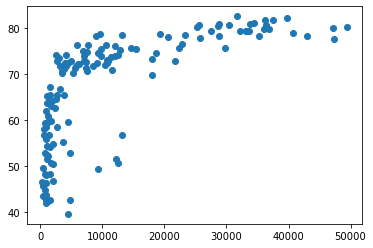

In [13]:
plt.scatter(gdp_cap,life_exp)

(array([88., 21., 12., 15.,  6.]),
 array([  277.5518587 , 10093.47952096, 19909.40718322, 29725.33484548,
        39541.26250774, 49357.19017   ]),
 <a list of 5 Patch objects>)

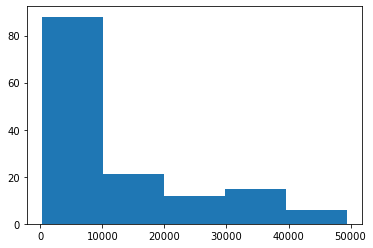

In [14]:
plt.hist(gdp_cap,bins=5)

In [34]:
plt.clf()

<Figure size 432x288 with 0 Axes>

(array([ 1.,  7.,  2.,  5.,  4.,  6.,  5.,  5.,  4.,  6.,  3.,  5.,  5.,
         0., 12., 21., 13., 10., 17., 11.]),
 array([39.613 , 41.7625, 43.912 , 46.0615, 48.211 , 50.3605, 52.51  ,
        54.6595, 56.809 , 58.9585, 61.108 , 63.2575, 65.407 , 67.5565,
        69.706 , 71.8555, 74.005 , 76.1545, 78.304 , 80.4535, 82.603 ]),
 <a list of 20 Patch objects>)

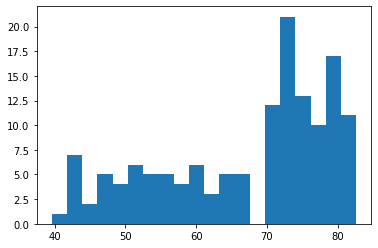

In [15]:
plt.hist(life_exp,bins=20)

(array([ 3.,  6.,  6.,  7.,  6.,  7.,  7.,  4.,  7.,  5.,  6., 27., 18.,
        17., 16.]),
 array([39.613, 42.479, 45.345, 48.211, 51.077, 53.943, 56.809, 59.675,
        62.541, 65.407, 68.273, 71.139, 74.005, 76.871, 79.737, 82.603]),
 <a list of 15 Patch objects>)

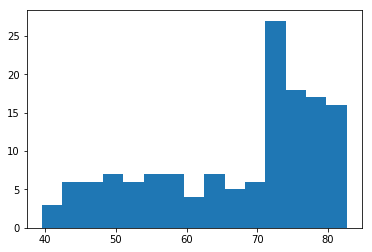

In [36]:
plt.hist(life_exp,bins=15)

(array([ 5.,  8., 14., 17., 20., 11.,  7.,  7.,  4.,  7.,  9.,  6., 11.,
        11.,  5.]),
 array([28.8       , 31.72466667, 34.64933333, 37.574     , 40.49866667,
        43.42333333, 46.348     , 49.27266667, 52.19733333, 55.122     ,
        58.04666667, 60.97133333, 63.896     , 66.82066667, 69.74533333,
        72.67      ]),
 <a list of 15 Patch objects>)

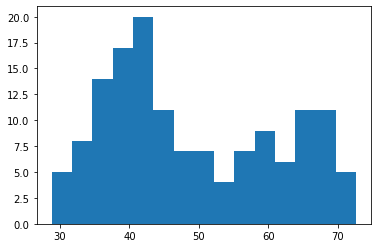

In [16]:
plt.hist(life_exp1950,bins=15)

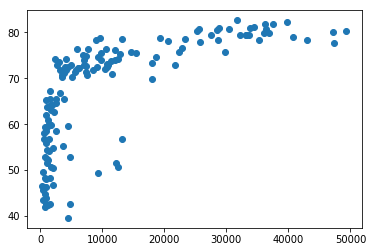

In [62]:
plt.scatter(gdp_cap, life_exp)

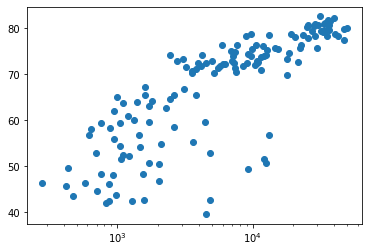

In [17]:
plt.scatter(gdp_cap, life_exp)
plt.xscale('log')

Text(0.5, 1.0, 'World Development in 2007')

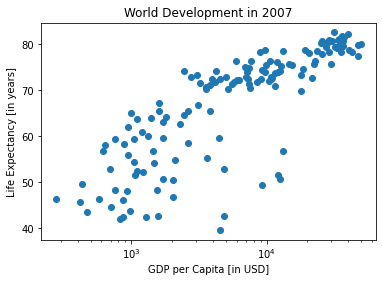

In [18]:
plt.scatter(gdp_cap, life_exp)
plt.xscale('log')
# Strings
xlab = 'GDP per Capita [in USD]'
ylab = 'Life Expectancy [in years]'
title = 'World Development in 2007'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)


([<matplotlib.axis.XTick at 0x23f5d6226a0>,
 [Text(0, 0, '1k'), Text(0, 0, '10k'), Text(0, 0, '100k')])

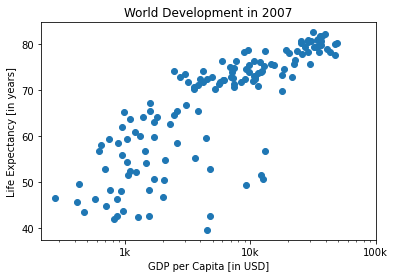

In [19]:
plt.scatter(gdp_cap, life_exp)
plt.xscale('log')
# Strings
xlab = 'GDP per Capita [in USD]'
ylab = 'Life Expectancy [in years]'
title = 'World Development in 2007'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)
# Definition of tick_val and tick_lab
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
# Adapt the ticks on the x-axis
plt.xticks(tick_val, tick_lab)

In [20]:
import numpy as np

In [21]:
np_pop = np.array(pop)

In [22]:
np_pop = np_pop *2

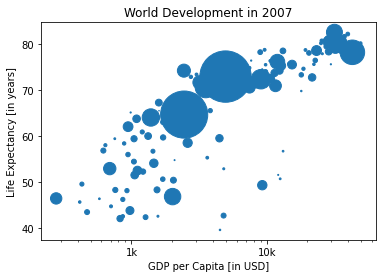

In [23]:
plt.xscale('log')
# Strings
xlab = 'GDP per Capita [in USD]'
ylab = 'Life Expectancy [in years]'
title = 'World Development in 2007'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
# Add title
plt.title(title)
# Definition of tick_val and tick_lab
tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
# Adapt the ticks on the x-axis
plt.xticks(tick_val, tick_lab)
# Update: set s argument to np_pop
plt.scatter(gdp_cap, life_exp, s = np_pop)

In [46]:
type(gdp_cap)

list

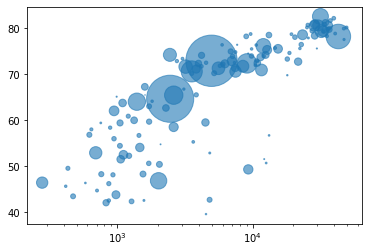

In [26]:
# Specify c and alpha inside plt.scatter()
plt.xscale('log')
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, alpha = 0.6)